# Week 13 (Evaluation and Deployment )

---

### Buat model sesuai dengan topik final project dengan metode yang berbeda untuk setiap anggota kelompok. Lanjutkan Deploy dengan menggunakan Streamlit atau Flask. Tuliskan Code, tahapan pembuatan deploy dan link url hasil deploy disini. 

### Tahapan 

#### 1. Buat app.py dan requirements.txt dengan kode berikut:

###### app.py

In [ ]:
import streamlit as st
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf


def load_tflite_model(model_path="melanoma_model.tflite"):
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter

def predict_image(interpreter, img, target_size=(224, 224)):
    # Preprocess the image
    img = img.convert("RGB")
    img = ImageOps.fit(img, target_size)
    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Set input tensor
    input_index = interpreter.get_input_details()[0]["index"]
    interpreter.set_tensor(input_index, img_array)

    # Run inference
    interpreter.invoke()

    # Get output
    output_index = interpreter.get_output_details()[0]["index"]
    preds = interpreter.get_tensor(output_index)
    preds = preds[0]  # extract from batch dimension

    # For binary classification: [benign_prob, malignant_prob]
    if len(preds) == 2:
        label_idx = np.argmax(preds)
        labels = ["Benign", "Malignant"]
        confidence = preds[label_idx]
        return labels[label_idx], float(confidence)
    else:  # if single output (e.g., malignant probability)
        confidence = preds[0]
        label = "Malignant" if confidence >= 0.5 else "Benign"
        return label, float(confidence)

# ---------------------------
# Streamlit App
# ---------------------------
st.set_page_config(page_title="Melanoma Classifier", page_icon="🩺", layout="centered")

st.title("🩺 Melanoma Skin Lesion Classifier")
st.markdown("""
Upload an image of a skin lesion and the app will predict whether it is **Benign** or **Malignant**.
The model also provides the confidence of the prediction.
""")

# Sidebar info
with st.sidebar:
    st.header("About")
    st.info(
        "This app uses a TensorFlow Lite model for fast melanoma classification.\n\n"
        "Upload a clear image of a skin lesion to get a prediction."
    )

# Upload image
uploaded_file = st.file_uploader("Upload an image (jpg/png)", type=["jpg", "jpeg", "png"])
if uploaded_file:
    image = Image.open(uploaded_file)
    
    # Show image preview
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Load TFLite model
    interpreter = load_tflite_model("melanoma_model.tflite")

    # Predict button
    if st.button("Predict"):
        with st.spinner("Analyzing..."):
            label, confidence = predict_image(interpreter, image)
        
        st.success(f"Prediction: **{label}**")
        st.info(f"Confidence: **{confidence*100:.2f}%**")

        # Optional: visual styling for confidence bar
        st.progress(confidence)
else:
    st.warning("Please upload an image to start prediction.")


##### requirements.txt

In [ ]:
streamlit>=1.24.0
tensorflow>=2.13.0
pillow
numpy

###### model.tflite

Group 6 - Model Link: 

#### 2. Create a new Repository in GitHub then commit the files above to the repository

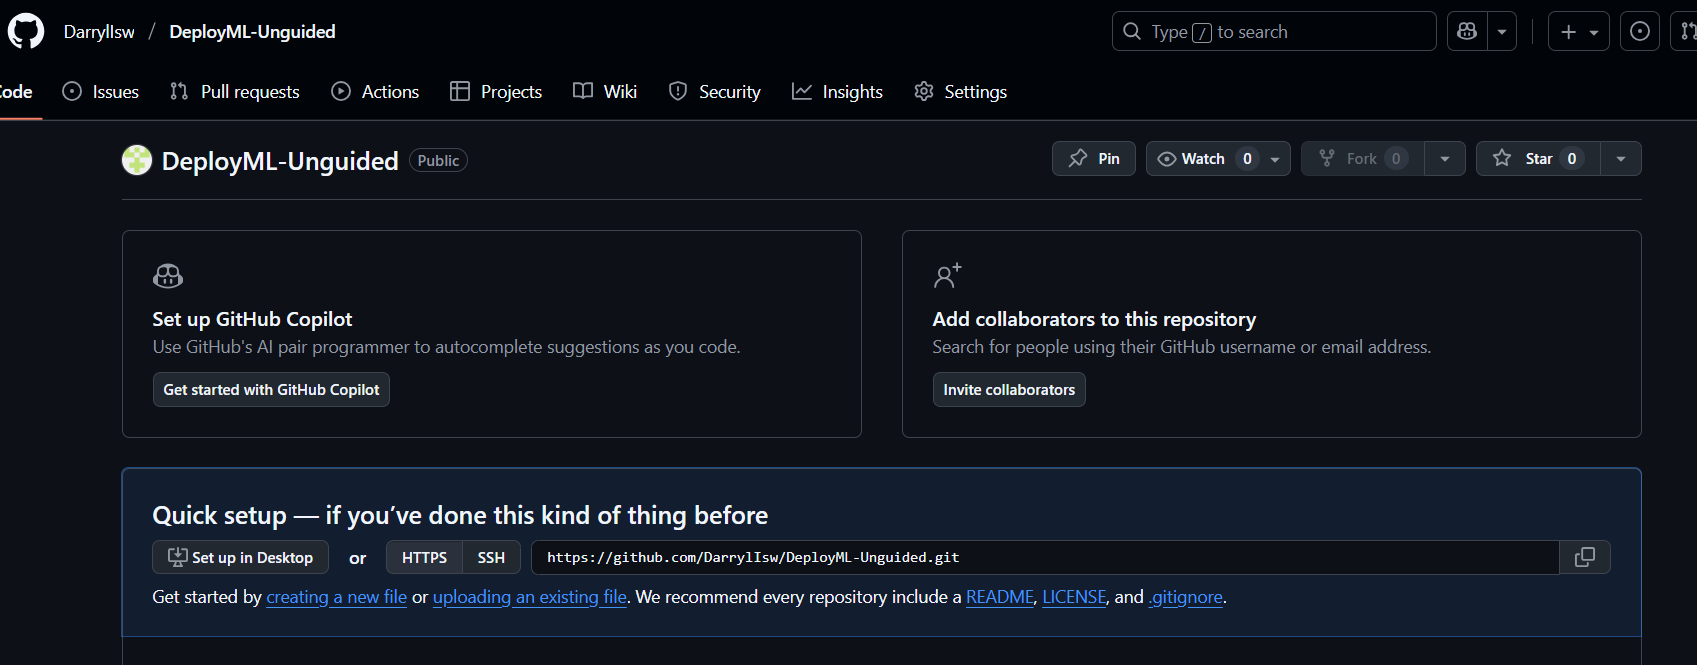